In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
# parameter
input_size = 1
output_size = 1
epochs = 60
learning_rate = 0.001

In [3]:
# dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# modeling
model = nn.Linear(input_size, output_size)

In [5]:
# Loss, optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# Train model
for epoch in range(epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch [{} / {}], loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

Epoch [5 / 60], loss: 0.2827
Epoch [10 / 60], loss: 0.2529
Epoch [15 / 60], loss: 0.2407
Epoch [20 / 60], loss: 0.2356
Epoch [25 / 60], loss: 0.2335
Epoch [30 / 60], loss: 0.2325
Epoch [35 / 60], loss: 0.2321
Epoch [40 / 60], loss: 0.2318
Epoch [45 / 60], loss: 0.2316
Epoch [50 / 60], loss: 0.2314
Epoch [55 / 60], loss: 0.2312
Epoch [60 / 60], loss: 0.2310


In [11]:
import matplotlib.pyplot as plt

In [12]:
# draw pred
pred = model(torch.from_numpy(x_train)).detach().numpy()

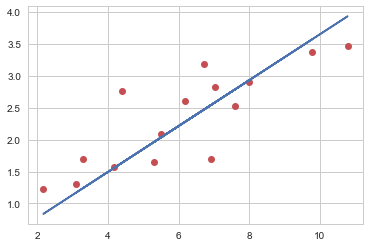

In [15]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, pred, label = 'Fitted line')